In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
#  pip install --upgrade scipy networkx

# 1. Data

In [3]:
df_hero_net = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\archive\hero-network.csv")
df_edges = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\archive\edges.csv")
df_nodes = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\archive\nodes.csv")

In [4]:
df_hero_net

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [5]:
df_edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [6]:
df_nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


In [7]:
df_nodes.shape

(19090, 2)

In [8]:
n_comics = df_nodes[df_nodes.type == 'comic'].count()
n_heros = df_nodes[df_nodes.type == 'hero'].count()
print(n_comics, n_heros)

node    12651
type    12651
dtype: int64 node    6439
type    6439
dtype: int64


## 1.1 Pre-processing 

We remove extra spaces and '/' at the end of the names in the datasets. 

In [9]:
df_hero_net["hero1"] = df_hero_net["hero1"].apply(lambda x: x[0:-1] if list(x)[-1] in [' ', '/'] else x)
df_hero_net["hero2"] = df_hero_net["hero2"].apply(lambda x: x[0:-1] if list(x)[-1] in [' ', '/'] else x)

In [10]:
df_hero_net

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE
574464,CALLISTO,CALIBAN
574465,CALIBAN,ROGUE


In [11]:
df_edges["hero"] = df_edges["hero"].apply(lambda x: x[0:-1] if list(x)[-1] in [' ', '/'] else x)
df_edges["comic"] = df_edges["comic"].apply(lambda x: x[0:-1] if list(x)[-1] in [' ', '/'] else x)

In [12]:
df_edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [13]:
df_nodes["node"] = df_nodes["node"].apply(lambda x: x[0:-1] if list(x)[-1] in [' ', '/'] else x)

In [14]:
df_nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


 We fix the 'spider-man/peter parker' error in the datasets.

In [15]:
df_hero_net = df_hero_net.replace('SPIDER-MAN/PETER PAR','SPIDER-MAN/PETER PARKER', regex=True)

In [16]:
df_nodes.node = df_nodes.node.replace('SPIDER-MAN/PETER PARKERKER','SPIDER-MAN/PETER PARKER', regex=True)

We check if the error is fixed and if there are other similar errors in the datasets.

At first, we check the hero names.

In [28]:
hero_edges = set(df_edges.hero)
hero_heronet = set(df_hero_net.hero1).union(set(df_hero_net.hero2))
hero_nodes = set(df_nodes.loc[df_nodes.type=='hero']['node'])

print(hero_edges - hero_heronet)
print(hero_heronet - hero_edges)

{'RED WOLF II', 'MARVEL BOY II/MARTIN', 'CALLAHAN, DANNY', 'FENRIS', 'DEATHCHARGE', 'SEA LEOPARD', 'SHARKSKIN', 'KULL', 'BERSERKER II', 'BLARE', 'GERVASE, LADY ALYSSA', 'CLUMSY FOULUP', 'LUNATIK II', 'ZANTOR', 'GIURESCU, RADU', 'RUNE', 'RANDAK', 'JOHNSON, LYNDON BAIN'}
set()


In [29]:
print(hero_edges - hero_nodes)
print(hero_nodes - hero_edges)

set()
set()


In [30]:
print(hero_nodes - hero_heronet)
print(hero_heronet - hero_nodes)

{'RED WOLF II', 'MARVEL BOY II/MARTIN', 'CALLAHAN, DANNY', 'FENRIS', 'DEATHCHARGE', 'SEA LEOPARD', 'SHARKSKIN', 'KULL', 'BERSERKER II', 'BLARE', 'GERVASE, LADY ALYSSA', 'CLUMSY FOULUP', 'LUNATIK II', 'ZANTOR', 'GIURESCU, RADU', 'RUNE', 'RANDAK', 'JOHNSON, LYNDON BAIN'}
set()


Then, we check the comic names.

In [31]:
comic_edges = set(df_edges.comic)
comic_nodes = set(df_nodes.loc[df_nodes.type=='comic']['node'])

In [32]:
print(comic_edges-comic_nodes)
print(comic_nodes-comic_edges)

set()
set()


We notice that some hero names are the same as comic names. We therefore decide to add word 'comic' at the end to the comic names equal to those of the heroes, in order to avoid problems in the creation and management of graphs.

In [33]:
equals = hero_edges.intersection(comic_edges)
equals

{'BLADE', 'REBEL', 'SABRE'}

In [34]:
hero_nodes.intersection(comic_nodes)

{'BLADE', 'REBEL', 'SABRE'}

In [35]:
for i in equals:
    df_edges.comic = df_edges.comic.replace(i, i+' comic', regex=True)


## 1.2 First graph

In [36]:
G1 = nx.MultiGraph()

In [37]:
df_hero_net.apply(lambda row: G1.add_edge(row['hero1'], row['hero2']), axis=1)

0          0
1          0
2          0
3          1
4          1
          ..
574462    27
574463    22
574464     8
574465    11
574466     1
Length: 574467, dtype: int64

In [38]:
#drop sefl-loops
G1.remove_edges_from(nx.selfloop_edges(G1))

In [39]:
list(G1.edges())[:10]

[('LITTLE, ABNER', 'PRINCESS ZANDA'),
 ('LITTLE, ABNER', 'PRINCESS ZANDA'),
 ('LITTLE, ABNER', 'PRINCESS ZANDA'),
 ('LITTLE, ABNER', 'PRINCESS ZANDA'),
 ('LITTLE, ABNER', 'PRINCESS ZANDA'),
 ('LITTLE, ABNER', 'PRINCESS ZANDA'),
 ('LITTLE, ABNER', 'PRINCESS ZANDA'),
 ('LITTLE, ABNER', 'PRINCESS ZANDA'),
 ('LITTLE, ABNER', "BLACK PANTHER/T'CHAL"),
 ('LITTLE, ABNER', "BLACK PANTHER/T'CHAL")]

In [40]:
dicOfOccurances = {}
for h1,h2 in df_hero_net.to_numpy():
    if h1 != h2:
        if (h1,h2) in dicOfOccurances:
            dicOfOccurances[(h1,h2)] += 1
        else:
            dicOfOccurances[(h1,h2)] = 1


In [41]:
G1_weighted = nx.MultiGraph()

In [42]:
i = 0
for edge in list(G1.edges()):
    try:
        G1_weighted.add_edge(edge[0], edge[1], weight = 1/dicOfOccurances[edge])
    except:
        G1_weighted.add_edge(edge[0], edge[1], weight = 1/dicOfOccurances[(edge[1], edge[0])])


In [43]:
edges, weights = zip(*nx.get_edge_attributes(G1_weighted, 'weight').items())
for i in range(20):
    print((edges[i], weights[i]))

(('LITTLE, ABNER', 'PRINCESS ZANDA', 0), 0.2)
(('LITTLE, ABNER', 'PRINCESS ZANDA', 1), 0.2)
(('LITTLE, ABNER', 'PRINCESS ZANDA', 2), 0.2)
(('LITTLE, ABNER', 'PRINCESS ZANDA', 3), 0.2)
(('LITTLE, ABNER', 'PRINCESS ZANDA', 4), 0.2)
(('LITTLE, ABNER', 'PRINCESS ZANDA', 5), 0.2)
(('LITTLE, ABNER', 'PRINCESS ZANDA', 6), 0.2)
(('LITTLE, ABNER', 'PRINCESS ZANDA', 7), 0.2)
(('LITTLE, ABNER', "BLACK PANTHER/T'CHAL", 0), 0.25)
(('LITTLE, ABNER', "BLACK PANTHER/T'CHAL", 1), 0.25)
(('LITTLE, ABNER', "BLACK PANTHER/T'CHAL", 2), 0.25)
(('LITTLE, ABNER', "BLACK PANTHER/T'CHAL", 3), 0.25)
(('LITTLE, ABNER', "BLACK PANTHER/T'CHAL", 4), 0.25)
(('LITTLE, ABNER', "BLACK PANTHER/T'CHAL", 5), 0.25)
(('LITTLE, ABNER', "BLACK PANTHER/T'CHAL", 6), 0.25)
(('LITTLE, ABNER', 'CARNIVORE/COUNT ANDR', 0), 0.3333333333333333)
(('LITTLE, ABNER', 'CARNIVORE/COUNT ANDR', 1), 0.3333333333333333)
(('LITTLE, ABNER', 'CARNIVORE/COUNT ANDR', 2), 0.3333333333333333)
(('LITTLE, ABNER', 'CARNIVORE/COUNT ANDR', 3), 0.33333333333

In [44]:
G1_weighted['LITTLE, ABNER']['PRINCESS ZANDA']

AtlasView({0: {'weight': 0.2}, 1: {'weight': 0.2}, 2: {'weight': 0.2}, 3: {'weight': 0.2}, 4: {'weight': 0.2}, 5: {'weight': 0.2}, 6: {'weight': 0.2}, 7: {'weight': 0.2}})

In [47]:
G1_weighted_graph = nx.Graph(G1_weighted)
G1_weighted_graph['LITTLE, ABNER']['PRINCESS ZANDA']

{'weight': 0.2}

In [49]:
edges, weights = zip(*nx.get_edge_attributes(G1_weighted_graph, 'weight').items())
for i in range(20):
    print((edges[i], weights[i]))

(('LITTLE, ABNER', 'PRINCESS ZANDA'), 0.2)
(('LITTLE, ABNER', "BLACK PANTHER/T'CHAL"), 0.25)
(('LITTLE, ABNER', 'CARNIVORE/COUNT ANDR'), 0.3333333333333333)
(('LITTLE, ABNER', 'IRON MAN/TONY STARK'), 1.0)
(('LITTLE, ABNER', 'GOLDEN-BLADE'), 1.0)
(('LITTLE, ABNER', 'DIXON, GENERAL'), 1.0)
(('LITTLE, ABNER', 'IRON MAN IV/JAMES R.'), 1.0)
(('LITTLE, ABNER', 'JOCASTA'), 1.0)
(('LITTLE, ABNER', 'FUJIKAWA, RUMIKO'), 1.0)
(('LITTLE, ABNER', 'MADAME MENACE/SUNSET'), 1.0)
(('LITTLE, ABNER', 'JACOBS, GLENDA'), 1.0)
(('LITTLE, ABNER', 'WAR MACHINE II/PARNE'), 1.0)
(('LITTLE, ABNER', 'SAPPER'), 1.0)
(('LITTLE, ABNER', 'HOGAN, VIRGINIA PEPP'), 1.0)
(('LITTLE, ABNER', 'BINARY/CAROL DANVERS'), 1.0)
(('LITTLE, ABNER', 'FIN FANG FOOM/MIDGAR'), 1.0)
(('LITTLE, ABNER', 'MANN, DR. J. VERNON'), 0.5)
(('LITTLE, ABNER', 'THOR/DR. DONALD BLAK'), 1.0)
(('LITTLE, ABNER', 'TEMPEST II/NICOLETTE'), 1.0)
(('LITTLE, ABNER', 'JARVIS, EDWIN'), 1.0)


In [50]:
dicOfWeights = {}
for edge in G1_weighted_graph.edges():
    dicOfWeights[edge] = G1_weighted_graph.get_edge_data(edge[0], edge[1])['weight']


In [66]:
print('Number of nodes of the first graph: ' + str(len(G1_weighted_graph.nodes())))
print('Number of edges of the first graph: ' +  str(len(G1_weighted_graph.edges())))

Number of nodes of the first graph: 6421
Number of edges of the first graph: 167100


## 1.3 Second graph

In [68]:
attributes = {}
for elem in df_edges['hero']:
    attributes[elem] = {'type' : 'hero' } 
for elem in df_edges['comic']:
    attributes[elem] = {'type' : 'comic' } 

print('Number of elements in attributes list: ' + str(len(attributes)))

Number of elements in attributes list: 19090


In [62]:
G2 = nx.from_pandas_edgelist(df_edges, 'hero', 'comic')
nx.set_node_attributes(G2, attributes)
print('Number of nodes of the second graph: ' + str(len(G2.nodes())))
print('Number of edges of the second graph: ' +  str(len(G2.edges())))

Number of nodes of the second graph: 19090
Number of edges of the second graph: 96104


In [69]:
nodes, types = zip(*nx.get_node_attributes(G2, 'type').items())
for i in range(10):
    print(nodes[i], types[i])

24-HOUR MAN/EMMANUEL hero
AA2 35 comic
3-D MAN/CHARLES CHAN hero
AVF 4 comic
AVF 5 comic
COC 1 comic
H2 251 comic
H2 252 comic
M/PRM 35 comic
M/PRM 36 comic


# 2. Backend Implementation

## Functionality 4 - Disconnecting Graphs 

Input:

- The graph data
- heroA: a superhero to which will relate sub-graph G_a
- heroB: a superhero to which will relate sub-graph G_b
- N: denoting the top N heroes that their data should be considered


Output:

- The minimum number of links (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b.

In [70]:
print(nx.is_connected(G1_weighted_graph))

False


In [72]:
# nx.connected_components gets the list of components,
# max() command returns the largest one
components = nx.connected_components(G1_weighted_graph)
largest_component = max(components, key=len)
len(largest_component)

6403

In [75]:
most_popular_heros = df_edges.groupby("hero").count().sort_values(by='comic', ascending = False)
most_popular_heros.head(5)

,comic
hero,
SPIDER-MAN/PETER PARKER,1577
CAPTAIN AMERICA,1334
IRON MAN/TONY STARK,1150
THING/BENJAMIN J. GR,963
THOR/DR. DONALD BLAK,956


In [96]:
def top_N(df, N):
    return df.groupby("hero", group_keys=False).count().sort_values(by='comic', ascending = False).head(N)

In [97]:
def create_G_topN(G, N, df):
    G_topN = G.copy()
    most_popular_heros = top_N(df, N)
    notInTopN = set(G.nodes()) - set(most_popular_heros.index)
    G_topN.remove_nodes_from(notInTopN)
    return G_topN


In [99]:
G_topN = create_G_topN(G1_weighted_graph, 10, df_edges)
print(len(G_topN.edges()),len(G1_weighted_graph.edges()) )

45 167100


In [81]:
list(G_topN.nodes())[:10]

['IRON MAN/TONY STARK',
 'THOR/DR. DONALD BLAK',
 'HULK/DR. ROBERT BRUC',
 'INVISIBLE WOMAN/SUE',
 'THING/BENJAMIN J. GR',
 'CAPTAIN AMERICA',
 'WOLVERINE/LOGAN',
 'MR. FANTASTIC/REED R',
 'SPIDER-MAN/PETER PARKER',
 'HUMAN TORCH/JOHNNY S']

In [82]:
def search_shortest_path(G, source, target):
    try:
        return nx.shortest_path(G, source, target, weight='weight', method='dijkstra')
    except: 
        return 0

We remove the edges with greater weight because, having fewer collaborations (or even just one), they can be disconnected more easily.

In [164]:
def functionality_4(G, heroA, heroB, N, df):
    count = 0
    G_final = create_G_topN(G, N, df)

    while search_shortest_path(G_final, heroA, heroB) != 0:
        shortest_path = search_shortest_path(G_final, heroA, heroB)
        dic = {}
        for i in range(len(shortest_path)-1):
            weight = G.get_edge_data(shortest_path[i], shortest_path[i+1])['weight']
            dic[(shortest_path[i],shortest_path[i+1])] = weight
        
        dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse = True))       
        G_final.remove_edge(list(dic.keys())[0][0], list(dic.keys())[0][1])
        count+=1
    
    colors = ['red' if node == heroA or node == heroB else 'blue' 
                for node in G_final.nodes()]
                
    return G_final, count, colors

# 3. Frontend Implementation

## Visualization 4 - Visualize the disconnected graph

### 1. Print the number of the links that should be disconnected

In [165]:
G_final, minNumLinks, colors = functionality_4(G1_weighted_graph, 'IRON MAN/TONY STARK',
'WOLVERINE/LOGAN', 25, df_edges)

In [166]:
print('The minimum number of links required to disconnect the original graph in two disconnected subgraphs is: ' + str(minNumLinks))

The minimum number of links required to disconnect the original graph in two disconnected subgraphs is: 100


### 2. Plot the original graph

In [167]:
G_topN = create_G_topN(G1_weighted_graph, 25, df_edges)

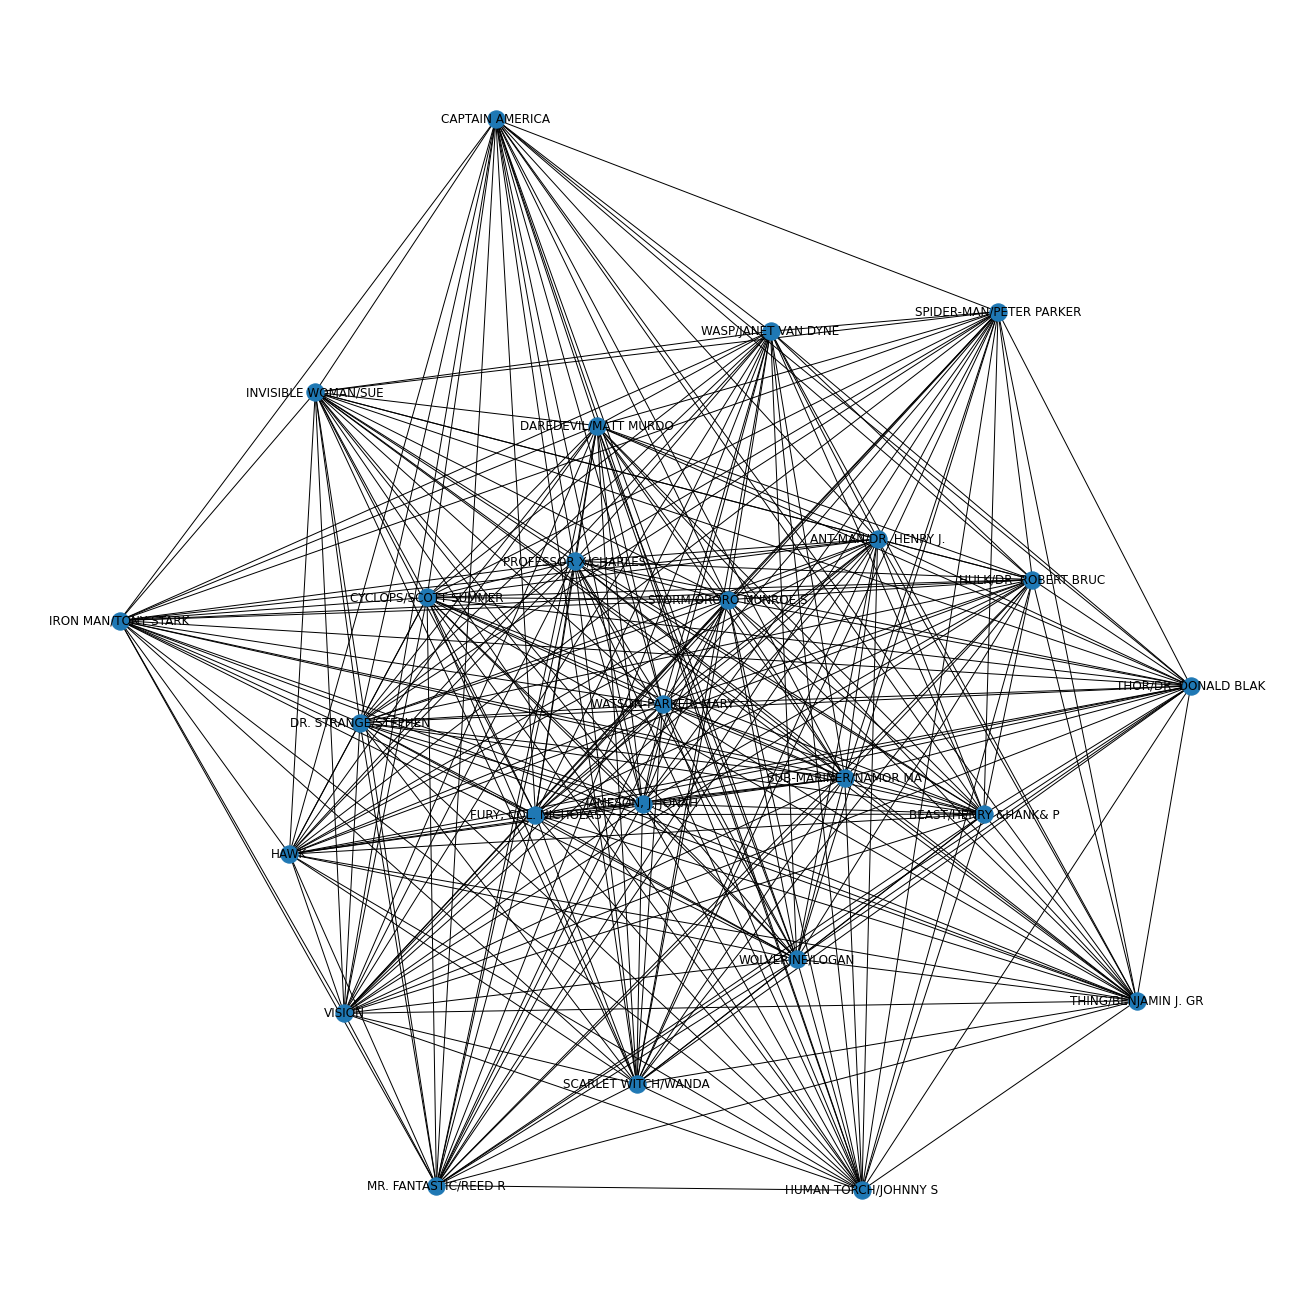

In [168]:
fig = plt.figure(figsize=(18,18))
nx.draw(G_topN, with_labels=True, node_size=300)
plt.show()

### 3. Plot the graph after removing the links and identify the two nodes

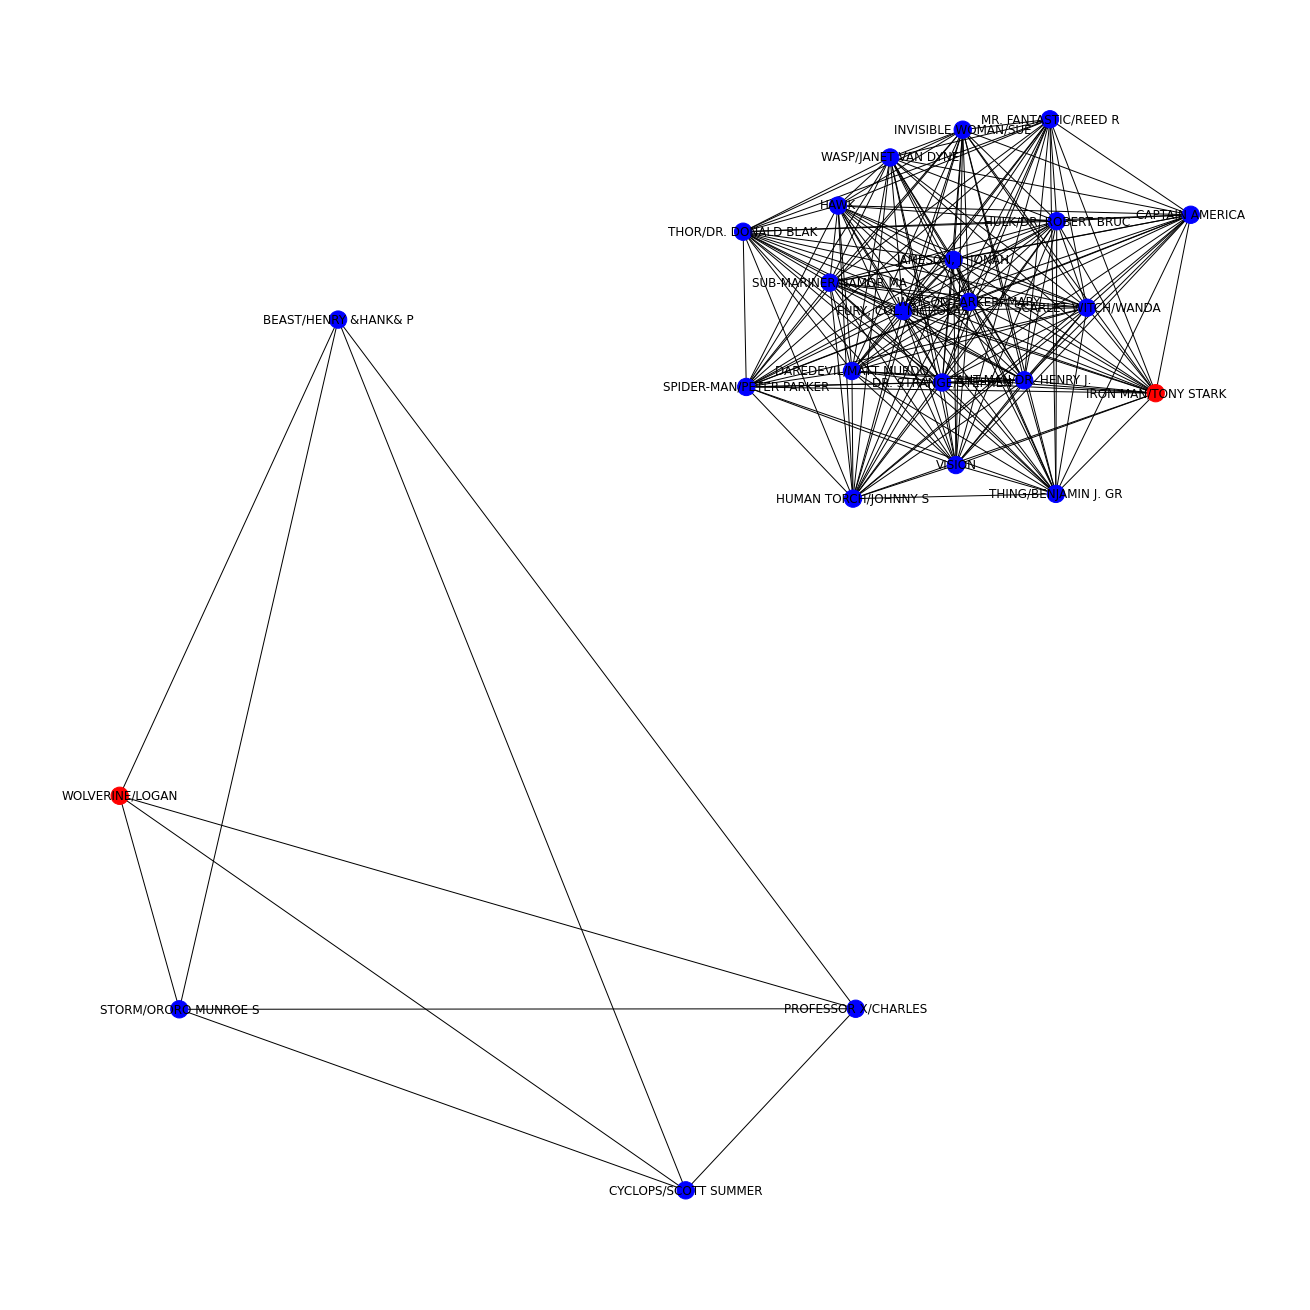

In [169]:
fig = plt.figure(figsize=(18,18))
nx.draw(G_final, node_color = colors, with_labels=True, node_size=300)
plt.show()

# 6. Algorithmic Question


Alex and Sarah have been together for two years, and Alex is now thinking about proposing to her. But, to surprise her, he wants to install an app on her phone that asks her if she will marry him at the right time.

However, to install the application secretly, he needs her phone's password, which he does not have. He knows her password is a poly-line made up of vertical or horizontal line segments. In a 3*3 grid, each line segment connects the centres of two cells. Alex learned the direction of each line segment by looking at her hand while unlocking her phone. He didn't pay much attention to the length of each line segment, but he is sure that her phone's operating system does not allow the poly-line to intersect with itself even at one point.

Alex wants to distract Sarah's attention long enough to test all possible patterns based on the directions of the line segments he has learned. Therefore, he needs you to assist him in calculating how many possible patterns he has to try based on those directions to estimate how much time he needs to check all of those possibilities. Given that the line segments were directed right, down, left, and up, the following figure depicts two valid and one invalid (as the poly-lines should not intersect even in one point) patterns.

**Input**:

The input is a single string that shows the direction of the segment lines and contains only the characters R, L, U, and D, which correspond to the Right, Left, Up, and Down directions. The string's maximum length is 10. It is also guaranteed that two consecutive characters will be different.

**Ouput**:

We expect to see only 1 number in the output, corresponding to the number of different patterns that can be generated based on the line segments Alex learned. In some cases, this number may be 0, indicating that no patterns can be generated using the learned line segments.